沙漠气候下测试

In [ ]:
import numpy as np
from plantclass import *
from world import *
import random
from scipy.spatial import KDTree
import matplotlib.pyplot as plt
from init import *
from waether_sim import simulate_tropical_savanna_climate_daily
from helper_func import *


temperature,humidity,_ = simulate_tropical_savanna_climate_daily()
total=300
plant_list = [1]*int(total*0.7) + [2]*int(total*0.1) + [3]*int(total*0.1) + [4]*int(total*0.1)

world=init(total)
tik = 0

temp_hp_loss=0
hum_hp_loss=0

def plant_itr(plant:Plant):
    sec = plant.get_sec()      # 返回索引
    section = world.sections[sec]
    neighbors = section.plants
    plant.life = HealthPointIteration(plant,section,neighbors)
    plant.water = WaterPointIteration(plant,section,neighbors)
    if plant.water < 60 :
        plant.life = plant.life + plant.water - 60

def plants_iteration():
    for plant in world.plants:
        plant_itr(plant)
        if plant.age_() == False:
            world.plants.remove(plant)
    #print("At time " + str(tik) + " there are " + str(len(world.plants)) + " left")
        

def sec_itr(section:Section,climate:Climate):
    section.sil_hum=SoilHumidityIteration(section=section,climate=climate)

world.vis(fname="start",collection=["Cactus","Hippophae","Thorn","Stipa"])
year = 1
log = []
while 1:

    climate = Climate(temperature[tik%360],humidity[tik%360])
    plants_iteration()
    for section in world.sections:
        sec_itr(section,climate)
    newplants = []
    for plant in world.plants:
        if plant.age % plant.repro_period == 0:
            sec = world.sections[plant.get_sec()]
            if sec.sil_hum > 200 and sec.nut > 200 and random.random() > 0.95:
                newplants.append(spawn(plant))
                sec.sil_hum = sec.sil_hum - 100
                sec.nut = sec.nut - 100
            #print("New plant spawned!")
    world.plants = world.plants + newplants

    world.update_sec()

    tik = tik + 1
    print(tik)
    if tik == 100:
        #world.vis(fname="100",collection=["Cactus","Hippophae","Thorn","Stipa"])
        with open('possibility.txt', 'w') as file:
            file.write(str(len(world.plants)/total)+" at day 100\n")

    if tik == 200:
        #world.vis(fname="200",collection=["Cactus","Hippophae","Thorn","Stipa"])
        with open('possibility.txt', 'a') as file:
            file.write(str(len(world.plants)/total)+" at day 200\n")

    log.append(len(world.plants)/total)
    if tik > 1000 or len(world.plants)==0 :
        break

    last_index = None
    for i in range(len(log)-1, -1, -1):
        if log[i] > 0.:
            last_index = i
        break

world.vis(fname="final",collection=["Cactus","Hippophae","Thorn","Stipa"])

x_ax = range(0,len(log))

plt.figure(dpi=300).set_size_inches(8,6)
plt.plot(x_ax,log)
plt.xlabel("day")
plt.ylabel("survival possibility")
plt.title("Combination of 4 plants")
plt.ylim(0,)
plt.xlim(0,)
plt.savefig("log.png")



测试植物配比

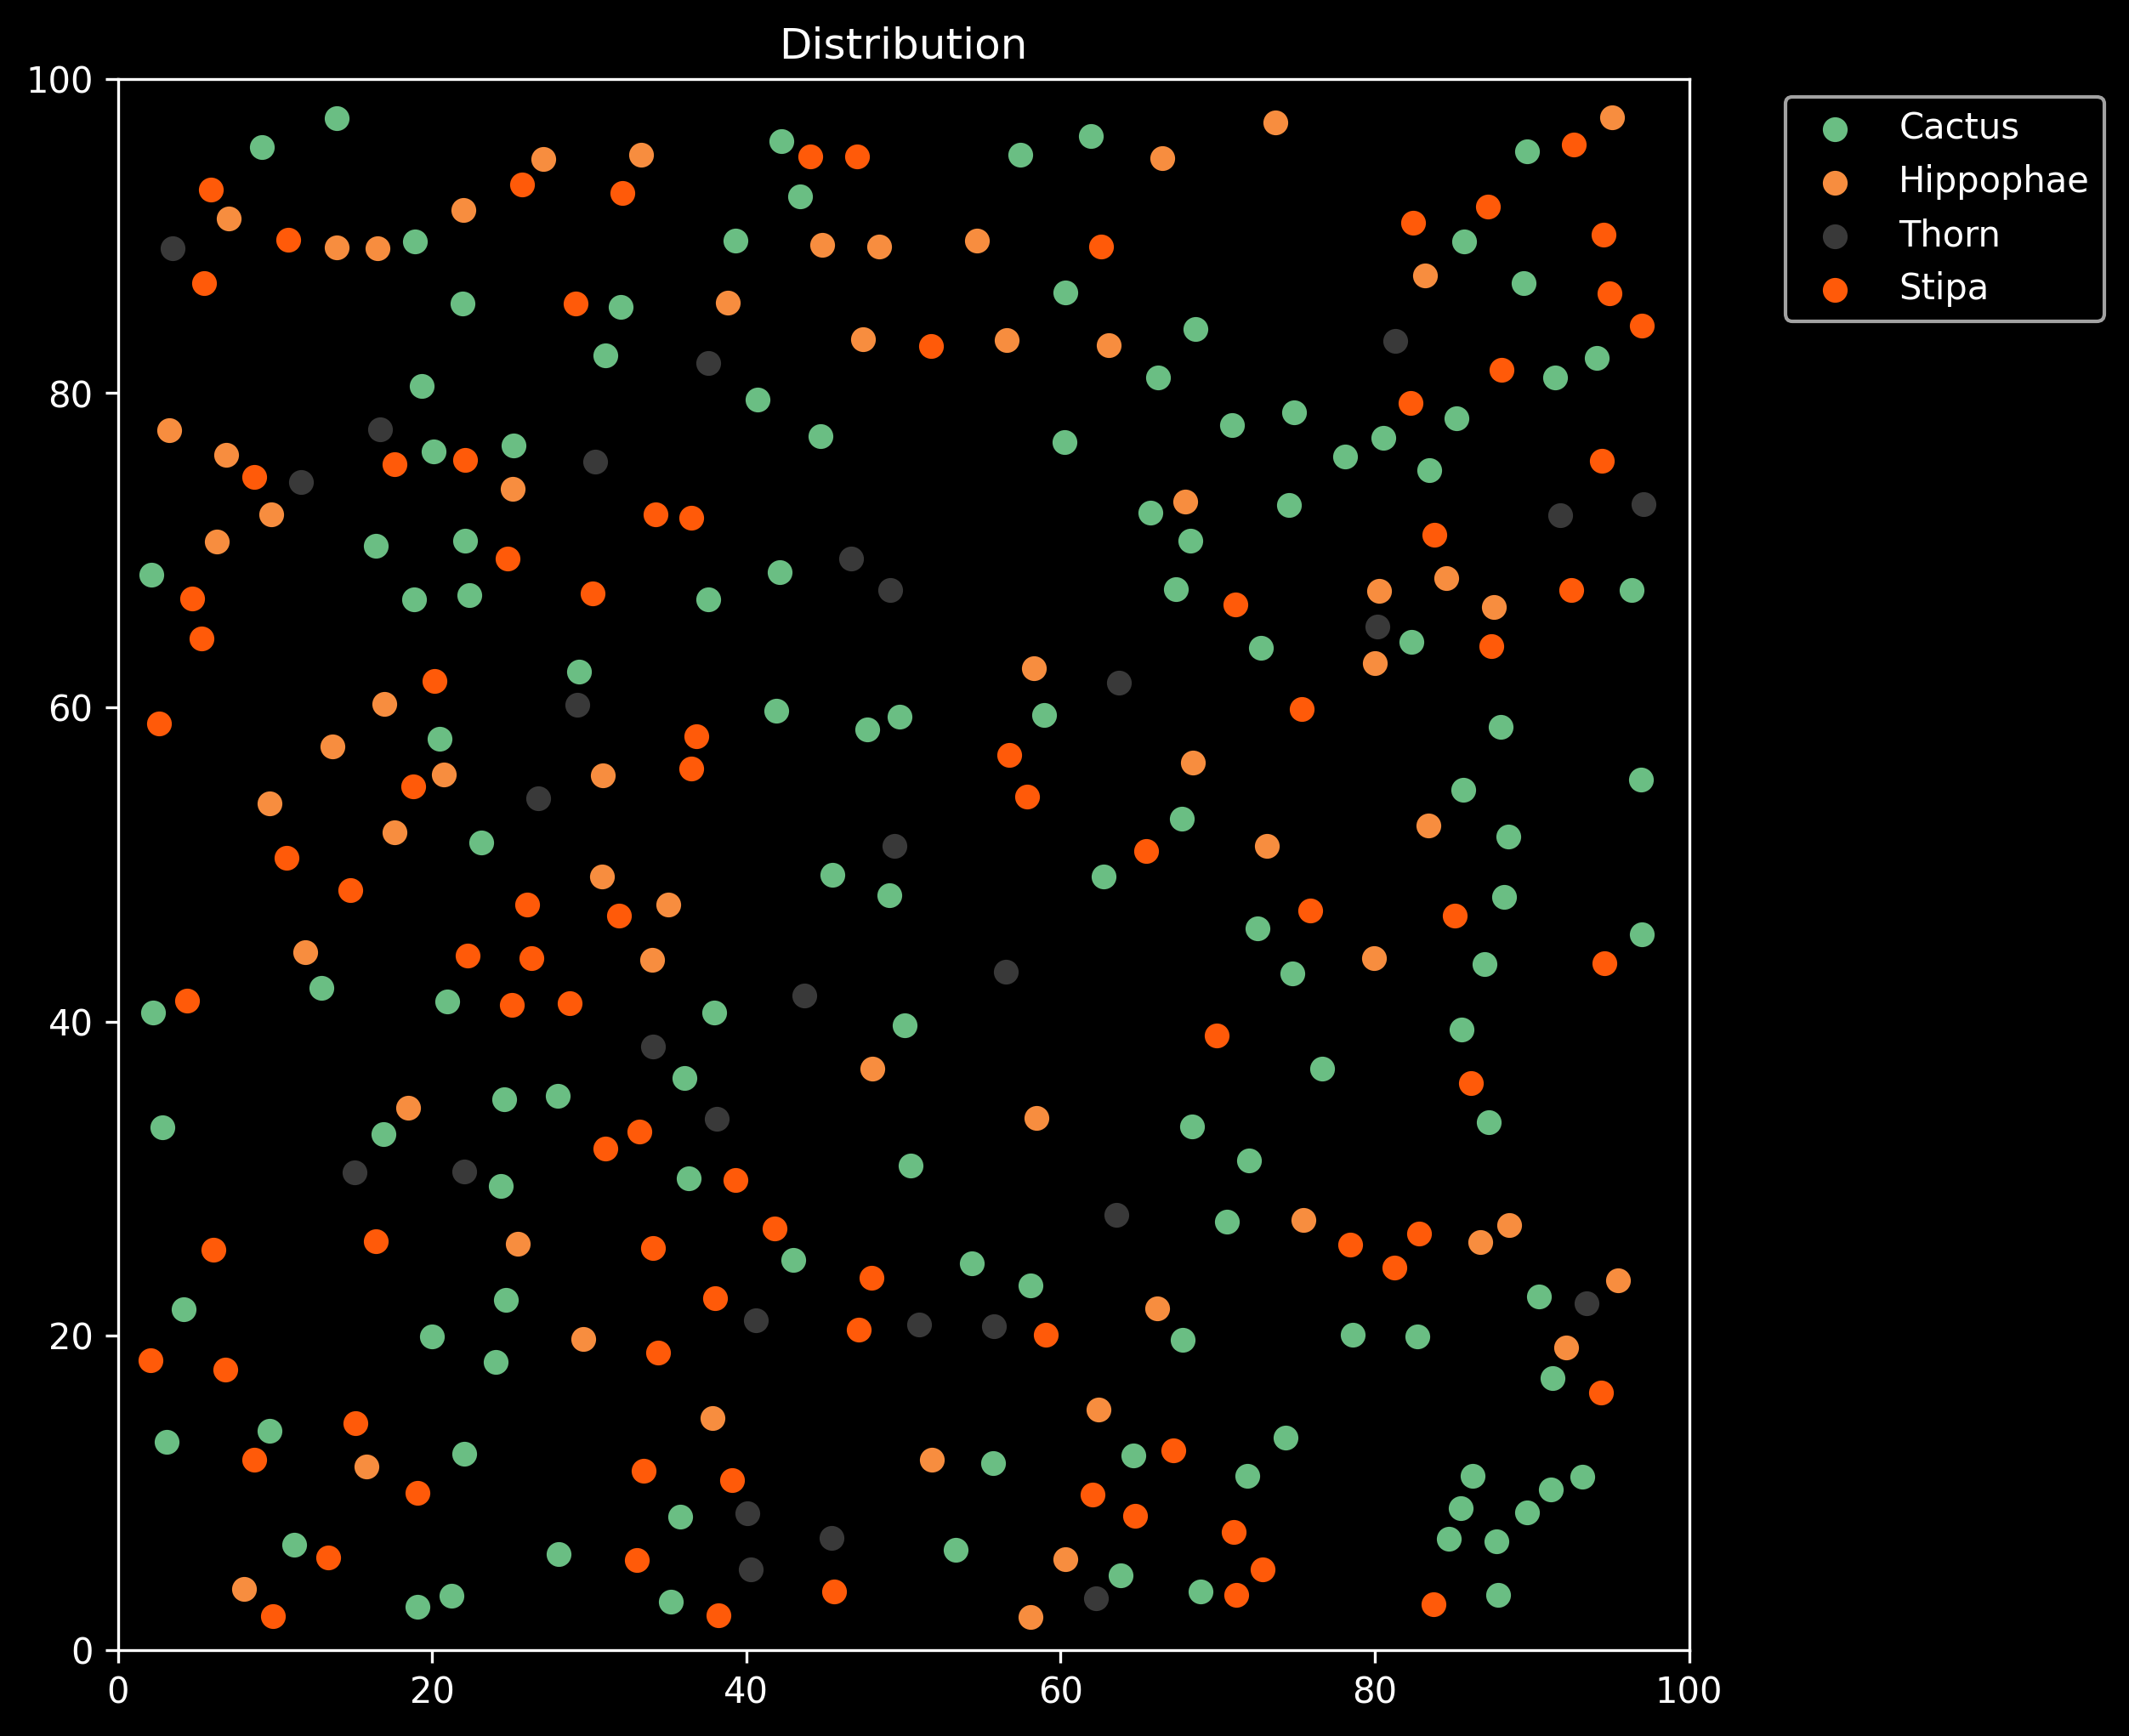

1
Plant Cactus died at age928
2
Plant Cactus died at age1130
3
4
5
6
7
8
9
10
Plant Cactus died at age1139
11
12
13
Plant Cactus died at age423
14
15
16
17
18
19
20
21
Plant Cactus died at age706
22
23
24
25
26
27
28
Plant Thorn died at age314
29
30
Plant Cactus died at age635
Plant Cactus died at age357
31
32
33
Plant Stipa died at age561
34
35
Plant Thorn died at age860
36
37
38
Plant Cactus died at age1163
39
40
Plant Hippophae died at age887
41
42
Plant Thorn died at age1090
43
44
45
Plant Cactus died at age774
46
47
48
49
50
Plant Thorn died at age857
51
52
Plant Thorn died at age1120
53
54
Plant Thorn died at age621
55
56
57
Plant Cactus died at age1183
58
59
60
61
62
63
64
65
66
67
68
69
70
Plant Cactus died at age279
71
72
73
74
75
76
77
78
79
Plant Cactus died at age247
80
81
82
83
84
85
86
87
88
89
90
Plant Cactus died at age1220
91
92
93
Plant Thorn died at age1222
94
95
96
97
98
Plant Cactus died at age1144
99
100
Unexpected exception formatting exception. Falling back to s

Traceback (most recent call last):
  File "/home/evans/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_6129/2275082181.py", line 2, in <module>
    comp_4plants(0.4,0.2,0.1,0.3,logfile="log1.png")
  File "/mnt/d/JI 21/23SP/MCM2023/code/PlantComSim/main.py", line 164, in comp_4plants
    world.update_sec()
  File "/mnt/d/JI 21/23SP/MCM2023/code/PlantComSim/world.py", line 63, in update_sec
    sec.add_plants(self.plants)
  File "/mnt/d/JI 21/23SP/MCM2023/code/PlantComSim/world.py", line 27, in add_plants
    self.add_plant(plant)
  File "/mnt/d/JI 21/23SP/MCM2023/code/PlantComSim/world.py", line 21, in add_plant
    if (plant.x >= self.x*10 and plant.x < self.x*10 + 10 and plant.y >= self.y*10 and plant.y < self.y*10 + 10):
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/evans/.

<Figure size 640x480 with 0 Axes>

In [2]:
from main import comp_4plants
comp_4plants(0.4,0.2,0.1,0.3,logfile="log1.png")